In [1]:
# imports
%load_ext autoreload
%autoreload 2
from victor_thesis_experiments import *
from victor_thesis_utils import *
from victor_thesis_landscapes import *
from victor_thesis_plots import *
from victor_thesis_metrics import *

starting
done


In [ ]:
# n-dim tests
def n_dim_tests(
):
    qnn = get_qnn("CudaPennylane", list(range(1)), 1, device="cpu")
    unitary = torch.tensor(
        np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu"
    )
    num_ticks = 12
    # generate data points
    non_entangled_inputs = generate_random_datapoints(5, 1, unitary)
    entangled_inputs = generate_random_datapoints(5, 2, unitary)
    z_o_inputs = get_zero_one_datapoints()
    # get 3d landscapes
    loss_z_o_3d= generate_3D_loss_landscape(
        num_ticks, z_o_inputs, unitary
    )
    loss_non_ent_3d= generate_3D_loss_landscape(
        num_ticks, non_entangled_inputs, unitary
    )
    loss_ent_3d= generate_3D_loss_landscape(
        num_ticks, entangled_inputs, unitary
    )
    landscapes = [loss_z_o_3d, loss_non_ent_3d, loss_ent_3d]
    #test total variation
    print(
        "TOTAL VARIATION: ",
        calc_total_variation(landscapes[0]),
        calc_total_variation(landscapes[1]),
        calc_total_variation(landscapes[2]),
    )
    #test igsd
    for landscape in landscapes:
        igsd = calc_IGSD(landscape)
        count = 1
        for sd in igsd:
            print(f"IGSD (dir {count}): {sd}")
            count +=1
        print("---------")
    #test fourier stuff
    print("fourier densities:")
    print(calc_fourier_density(landscapes[0]))
    print(calc_fourier_density(landscapes[1]))
    print(calc_fourier_density(landscapes[2]))

    #test scalar curvature
    print("---------")
    print("Scalar curvature absolute sums: ")
    for landscape in landscapes:
        print(np.sum(np.absolute(calc_scalar_curvature(landscape))))
    
n_dim_tests()

In [ ]:
# n-dim tests 2d
qnn = get_qnn("CudaU2", list(range(1)), 1, device="cpu")
unitary = torch.tensor(
    np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu"
)
num_ticks = 12
# generate data points
non_entangled_inputs = generate_random_datapoints(5, 1, unitary)
entangled_inputs = generate_random_datapoints(5, 2, unitary)
z_o_inputs = get_zero_one_datapoints()
# get 3d landscapes
loss_z_o_3d= generate_loss_landscape(
    num_ticks, z_o_inputs, unitary, qnn
)
loss_non_ent_3d= generate_loss_landscape(
    num_ticks, non_entangled_inputs, unitary, qnn
)
loss_ent_3d= generate_loss_landscape(
    num_ticks, entangled_inputs, unitary, qnn
)
landscapes = [loss_z_o_3d, loss_non_ent_3d, loss_ent_3d]
#test scalar curvature
# print(get_scalar_curvature(landscapes[0]))
# get_scalar_curvature(landscapes[1])
# get_scalar_curvature(landscapes[2])
#test total variation
print(
    "TOTAL VARIATION: ",
    calc_total_variation(landscapes[0]),
    calc_total_variation(landscapes[1]),
    calc_total_variation(landscapes[2]),
)
#test igsd
for landscape in landscapes:
    igsd = calc_IGSD(landscape)
    count = 1
    for sd in igsd:
        print(f"IGSD (dir {count}): {sd}")
        count +=1
    print("---------")
#test fourier stuff
print("fourier stuff")
fourier_landscape_z_o = get_fourier_landscape(z_o_inputs, unitary, qnn)
fourier_landscape_non_entangled = get_fourier_landscape(non_entangled_inputs, unitary, qnn)
fourier_landscape_entangled = get_fourier_landscape(entangled_inputs, unitary, qnn)
print(calc_fourier_density(landscapes[0]))
print(calc_fourier_density(landscapes[1]))
print(calc_fourier_density(landscapes[2]))
#test scalar curvature
for landscape in landscapes:
    print("SC: ",np.sum(np.absolute(calc_scalar_curvature(landscape))))

c:\Users\victo\Desktop\master-thesis\Code\entangled_qnn_training-main\victor_thesis_landscapes.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  tensor = torch.tensor([zero_state, one_state])


fourier stuff
different versions of calculating fourier density - not sure which one is the correct one?
FD lib with np linalg norms: 3.233
FD lib with semi custom norms: 3.233
FD lib with full custom norms: 3.233
different versions of calculating fourier density - not sure which one is the correct one?
FD lib with np linalg norms: 2.387
FD lib with semi custom norms: 4.726
FD lib with full custom norms: 4.592
different versions of calculating fourier density - not sure which one is the correct one?
FD lib with np linalg norms: 1.742
FD lib with semi custom norms: 4.261
FD lib with full custom norms: 4.127
(20, 20)
(20, 20)
(20, 20)


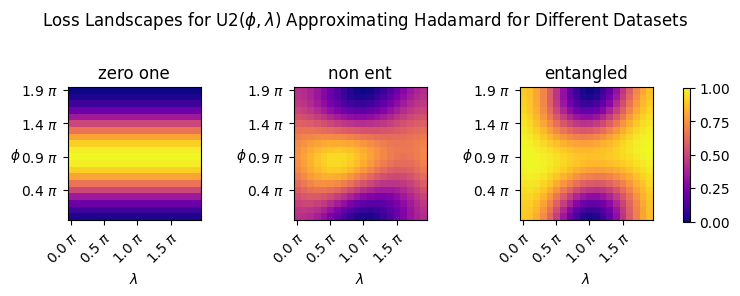

real values


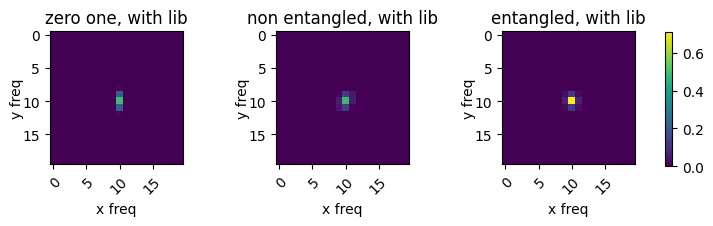

absolute sum:  3.238244021542462


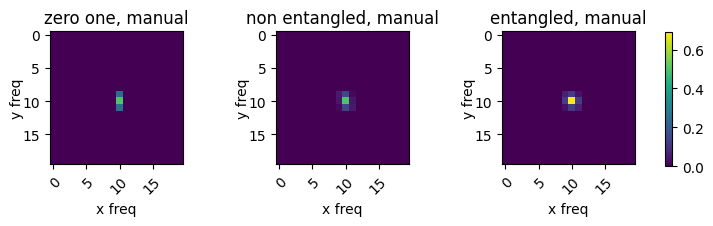

absolute sum:  3.3763487178149436
imaginary values


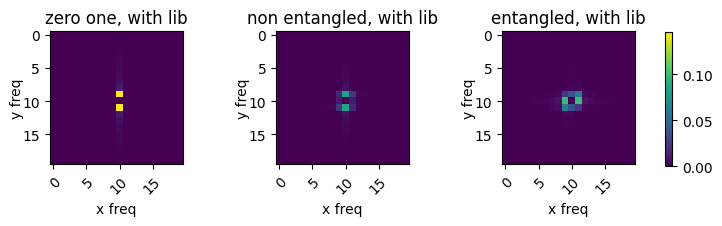

absolute sum:  1.2244369029660254


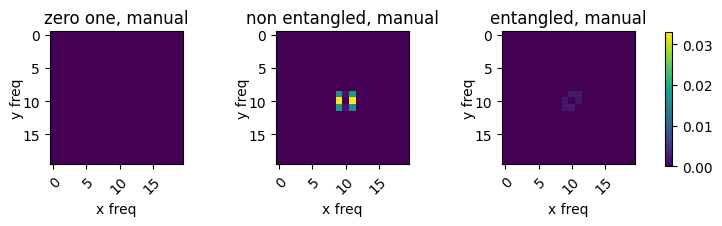

absolute sum:  0.14907468331249402
sum of both


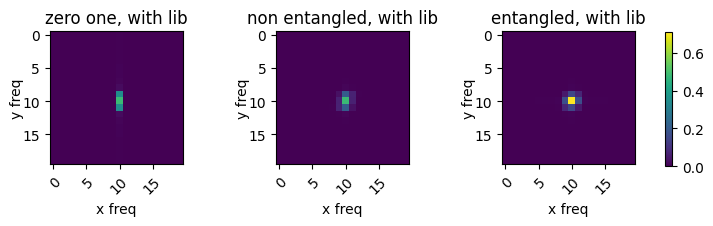

absolute sum:  4.462680924508487


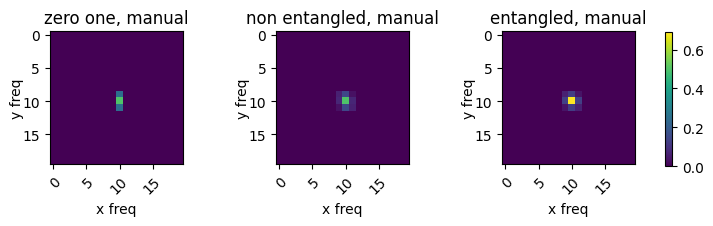

absolute sum:  3.525423401127437


In [2]:
# fourier testing


# n-dim tests 2d
qnn = get_qnn("CudaU2", list(range(1)), 1, device="cpu")
unitary = torch.tensor(
    np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu"
)
num_ticks = 20
# generate data points
non_entangled_inputs = generate_random_datapoints(5, 1, unitary)
entangled_inputs = generate_random_datapoints(5, 2, unitary)
z_o_inputs = get_zero_one_datapoints()
# get 2d landscapes
loss_z_o= generate_loss_landscape(
    num_ticks, z_o_inputs, unitary, qnn
)
loss_non_ent= generate_loss_landscape(
    num_ticks, non_entangled_inputs, unitary, qnn
)
loss_ent= generate_loss_landscape(
    num_ticks, entangled_inputs, unitary, qnn
)
landscapes = [loss_z_o, loss_non_ent, loss_ent]

#test fourier stuff
print("fourier stuff")
fourier_landscape_z_o = get_fourier_landscape(z_o_inputs, unitary, qnn,num_ticks).values
z_o_fd, z_o_f_plot = calc_fourier_density(landscapes[0])
print("FD manual custom:", z_o_fd)
fourier_landscape_non_entangled = get_fourier_landscape(non_entangled_inputs, unitary, qnn,num_ticks).values
n_e_fd, non_ent_f_plot = calc_fourier_density(landscapes[1])
print("FD manual custom:", n_e_fd)
fourier_landscape_entangled = get_fourier_landscape(entangled_inputs, unitary, qnn,num_ticks).values
e_fd, ent_f_plot = calc_fourier_density(landscapes[2])
print("FD manual custom:", e_fd)

# differences possibly explained by different loss landscape sampling
plot_row(landscapes, ["zero one", "non ent","entangled"], "Hadamard", "U2", mode="default")
print("real values")
plot_fourier_row(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real), ["zero one, with lib", "non entangled, with lib","entangled, with lib"])
print("absolute sum: ", np.sum(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real)))
plot_fourier_row(np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).real), ["zero one, manual", "non entangled, manual","entangled, manual"])
print("absolute sum: ", np.sum(np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).real)))

print("imaginary values")
plot_fourier_row(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag), ["zero one, with lib", "non entangled, with lib","entangled, with lib"])
print("absolute sum: ", np.sum(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag)))
plot_fourier_row(np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).imag), ["zero one, manual", "non entangled, manual","entangled, manual"])
print("absolute sum: ", np.sum(np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).imag)))

print("sum of both")
plot_fourier_row(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag)+np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real), ["zero one, with lib", "non entangled, with lib","entangled, with lib"])
print("absolute sum: ", np.sum(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag)+np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real)))
plot_fourier_row(np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).imag)+np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).real), ["zero one, manual", "non entangled, manual","entangled, manual"])
print("absolute sum: ", np.sum(np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).imag)+np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).real)))
# print(calc_fourier_density(landscapes[0]))
# print(calc_fourier_density(landscapes[1]))
# print(calc_fourier_density(landscapes[2]))

In [ ]:
# EXP on Hadamard
run_hadamard()

In [ ]:
# EXP on Pauli-X
run_pauli_x()

In [ ]:
# EXP on Pauli-Y
run_pauli_y()

In [ ]:
# EXP on Pauli-Z
run_pauli_z()

In [ ]:
# EXP on Phase (S)
run_phase_s()